# Lecture 7: Model Assessment
---
** Credit to: Li Haoyu, Dai Lutao**

## 4. Bias-variance trade-off

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as rnd
from pandas import Series, DataFrame

ffun = lambda x: np.exp(-(x-3)**2)
x = np.arange(0.1,4,0.1)
rnd.seed(2017)
y = ffun(x) + 0.1*rnd.normal(0,1,len(x))
DataX = DataFrame(x)
DataX['1'] = y
DataX.head()

,0,1
0,0.1,-0.102072
1,0.2,-0.013646
2,0.3,0.020592
3,0.4,0.058507
4,0.5,-0.037527


## Method 1: Using NumPy

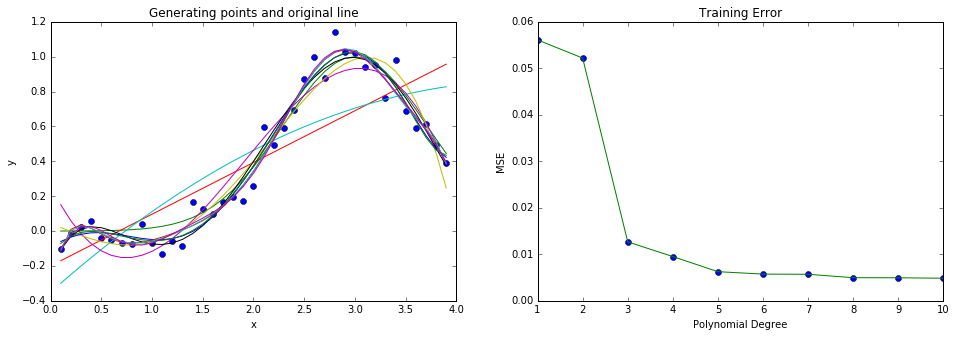

In [3]:
fig, subplt = plt.subplots(1, 2)
fig.set_size_inches(16, 5)
subplt[0].plot(x,y,'o',label = "Polynomial Curve Fitting")
subplt[0].set_title("Generating points and original line")
subplt[0].set_xlabel("x")
subplt[0].set_ylabel("y")
subplt[0].plot(x,ffun(x))

from numpy import polyfit
from numpy import polyval
from numpy import linspace
dmax = 10
err = []
for d in range(1,dmax+1):
    #print(d)
    Coef = polyfit(x,y,deg = d)
    yfitted = polyval(Coef,x)
    subplt[0].plot(x,yfitted)
    err.append(sum((y-yfitted)**2)/len(x))
#plt.subplot(122)
subplt[1].plot(range(1,dmax+1),err,'o')
subplt[1].plot(range(1,dmax+1),err)
subplt[1].set_title("Training Error")
subplt[1].set_xlabel("Polynomial Degree")
subplt[1].set_ylabel("MSE")
plt.show()

## Method 2: Using sklearn

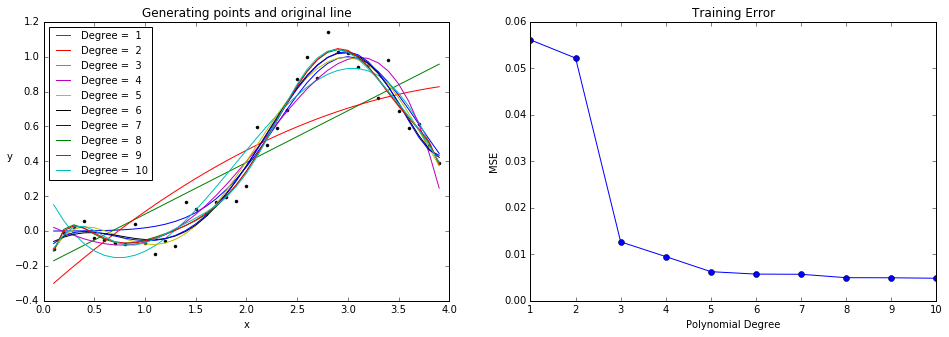

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

fig, ax = plt.subplots(figsize=(16,5))

plt.subplot(121)
plt.plot(x, y, 'k.', x, ffun(x), '-');
plt.xlabel('x');
plt.ylabel('y');

y_new = {}

for degree in range(1, 11):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline((
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ))
    polynomial_regression.fit(np.c_[x], np.c_[y])
    y_newbig = polynomial_regression.predict(np.c_[x])
    y_new[degree] = y_newbig
    plt.plot(x, y_newbig, label='Degree =  '+str(degree))

plt.legend(loc="upper left", fontsize=10)
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.title("Generating points and original line")

plt.subplot(122)

errs = []
for i, y_pred in y_new.items():
    errs.append(mse(y, y_pred))
plt.plot(y_new.keys(), errs, 'o-')
plt.title("Training Error")
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')

plt.show()



## Method 1: numpy:

number of folds is : 8.0


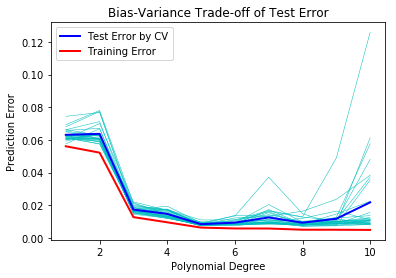

In [10]:
def Fillyhat(yhat,fittedY):
    for i in range(len(fittedY)):
        yhat.append(fittedY[i])

nfold = 5
rnd.seed(9999)
n1 = np.round(len(DataX)/nfold)
maxrep = 30 #Monte-Carlo Replicates
print("number of folds is :",n1)
ErrorTest = []
for dummy in range(maxrep):
    tempX = DataX.sample(frac = 1)
    tempX.yhat = []
    cv = []
    tempXsize = len(tempX)
    for d in range(1,dmax+1):
        for k in range(1,nfold+1):
            Idx = linspace(n1*(k-1),n1*(k)-1,n1)
            if k==(nfold):
                Idx = linspace(n1*(k-1), len(tempX)-1, len(tempX)-n1*(k-1))
            IdxLeft = [i for i in range(len(DataX)) if i not in Idx]
            TestX = tempX.iloc[Idx,:]
            TrainX = tempX.iloc[IdxLeft,:]
            fit = polyfit(x = TrainX.iloc[:,0],
                          y = TrainX.iloc[:,1],deg = d)
            fittedY = polyval(fit,TestX.iloc[:,0])
            Fillyhat(tempX.yhat, fittedY)
        #print(tempX.yhat)
        residuals = sum((tempX.yhat-tempX.iloc[:,1])**2)
        tempX.yhat = []# emptize tempX.yhat for next loop
        cv.append(residuals/tempXsize)   
    ErrorTest.append(cv)
    
#Draw the bias-variance trade-off
for i in range(len(ErrorTest)):
    plt.plot(linspace(1,10,10),ErrorTest[i],'-',color = 'c',linewidth=0.5)
plt.title("Bias-Variance Trade-off of Test Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("Prediction Error")

Rowmeans = []
for i in range(10):
    tmpsum = 0
    for j in range(len(ErrorTest)):
        tmpsum += ErrorTest[j][i]
    Rowmeans.append(tmpsum/len(ErrorTest))
    
line1 = plt.plot(linspace(1,10,10),Rowmeans,'-',label = 'Test Error by CV',color = 'b',linewidth = 2)
line2 = plt.plot(linspace(1,10,10),err,'-',label ='Training Error',color = 'r',linewidth = 2)
plt.legend(loc = 'best')
plt.show()

## Method 2: Sklearn:

number of folds is : 8.0


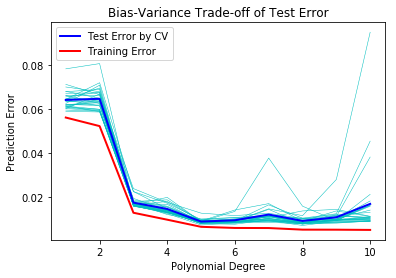

In [11]:
def Fillyhat(yhat,fittedY):
    for i in range(len(fittedY)):
        yhat.append(fittedY[i][0])

nfold = 5
rnd.seed(9999)
n1 = np.round(len(DataX)/nfold)
maxrep = 30 #Monte-Carlo Replicates
print("number of folds is :",n1)
ErrorTest = []
for dummy in range(maxrep):
    tempX = DataX.sample(frac = 1)
    tempX.yhat = []
    cv = []
    tempXsize = len(tempX)
    for d in range(1,dmax+1):
        for k in range(1,nfold+1):
            Idx = linspace(n1*(k-1),n1*(k)-1,n1)
            if k==(nfold):
                Idx = linspace(n1*(k-1), len(tempX)-1, len(tempX)-n1*(k-1))
            IdxLeft = [i for i in range(len(DataX)) if i not in Idx]
            TestX = tempX.iloc[Idx,:]
            TrainX = tempX.iloc[IdxLeft,:]            
            polybig_features = PolynomialFeatures(degree=d, include_bias=False)
            std_scaler = StandardScaler()
            lin_reg = LinearRegression()
            polynomial_regression = Pipeline((
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
            ))
            polynomial_regression.fit(np.c_[TrainX.iloc[:,0].tolist()], np.c_[TrainX.iloc[:,1].tolist()])
            fittedY = polynomial_regression.predict(np.c_[TestX.iloc[:,0].tolist()]) 
            Fillyhat(tempX.yhat, fittedY)
        residuals = sum((tempX.yhat-tempX.iloc[:,1])**2)
        tempX.yhat = []# emptize tempX.yhat for next loop
        cv.append(residuals/tempXsize)   
    ErrorTest.append(cv)
    
#Draw the bias-variance trade-off
for i in range(len(ErrorTest)):
    plt.plot(linspace(1,10,10),ErrorTest[i],'-',color = 'c',linewidth=0.5)
plt.title("Bias-Variance Trade-off of Test Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("Prediction Error")

Rowmeans = []
for i in range(10):
    tmpsum = 0
    for j in range(len(ErrorTest)):
        tmpsum += ErrorTest[j][i]
    Rowmeans.append(tmpsum/len(ErrorTest))
    
line1 = plt.plot(linspace(1,10,10),Rowmeans,'-',label = 'Test Error by CV',color = 'b',linewidth = 2)
line2 = plt.plot(linspace(1,10,10),err,'-',label ='Training Error',color = 'r',linewidth = 2)
plt.legend(loc = 'best')
plt.show()

## 5. Bootstrap [Optional, to be updated]